In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to your dataset folder
!ls "/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Car (100)_0_1_normalized.png'	       'Motorcycle (102)_0_1_normalized.png'
'Car (10)_0_1_normalized.png'	       'Motorcycle (103)_0_1_normalized.png'
'Car (101)_0_1_normalized.png'	       'Motorcycle (104)_0_1_normalized.png'
'Car (1)_0_1_normalized.png'	       'Motorcycle (105)_0_1_normalized.png'
'Car (102)_0_1_normalized.png'	       'Motorcycle (106)_0_1_normalized.png'
'Car (103)_0_1_normalized.png'	       'Motorcycle (107)_0_1_normalized.png'
'Car (104)_0_1_normalized.png'	       'Motorcycle (108)_0_1_normalized.png'
'Car (105)_0_1_normalized.png'	       'Motorcycle (109)_0_1_normalized.png'
'Car (106)_0_1_normalized.png'	       'Motorcycle (110)_0_1_normalized.png'
'Car (107)_0_1_normalized.png'	       'Motorcycle (11)_0_1_normalized.png'
'Car (108)_0_1_normalized.png'	       'Motorcycle (111)_0_1_normalized.png'
'Car (109)_0_1_normalized.png'	       '

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import shutil

In [ ]:

# Step 1: Load pretrained ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")
model = Model(inputs=base_model.input, outputs=base_model.output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Path to dataset folder (update if needed)
data_dir = "/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output"

# Collect features
features = []
image_paths = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            path = os.path.join(root, file)
            try:
                img = load_img(path, target_size=(224,224))
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)

                feat = model.predict(img_array, verbose=0)
                features.append(feat.flatten())
                image_paths.append(path)
            except:
                pass

features = np.array(features)
print("Feature shape:", features.shape)

Feature shape: (1584, 2048)


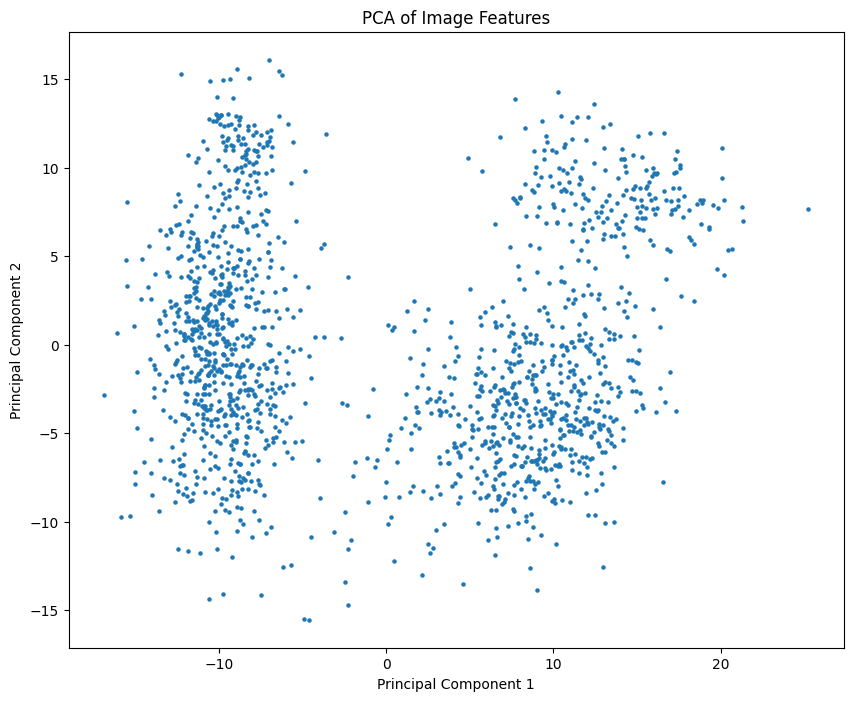

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Visualize the features
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], s=5)
plt.title('PCA of Image Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Step 4: Apply Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(features)

# Predict anomalies (-1 for anomalies, 1 for inliers)
predictions = model.predict(features)

# Separate anomalies and inliers
anomaly_indices = np.where(predictions == -1)[0]
inlier_indices = np.where(predictions == 1)[0]

print(f"Number of anomalies detected: {len(anomaly_indices)}")
print(f"Number of inliers detected: {len(inlier_indices)}")

Number of anomalies detected: 6
Number of inliers detected: 1578


In [ ]:
# List the image paths for the detected anomalies
anomaly_image_paths = [image_paths[i] for i in anomaly_indices]
print("Image paths for detected anomalies:")
for path in anomaly_image_paths:
    print(path)

Image paths for detected anomalies:
/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (75)_0_1_normalized.png
/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (794)_0_1_normalized.png
/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Motorcycle (129)_0_1_normalized.png
/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Motorcycle (26)_0_1_normalized.png
/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Motorcycle (40)_0_1_normalized.png
/content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (639)_0_1_normalized.png


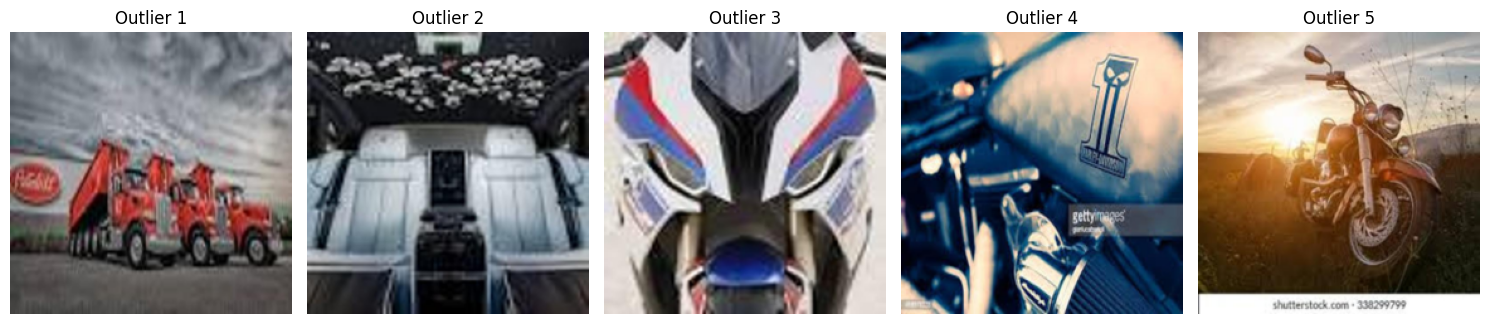

In [ ]:
# Visualize some of the outliers
num_outliers_to_show = min(len(anomaly_image_paths), 5)  # Display up to 5 outliers

plt.figure(figsize=(15, 5))
for i in range(num_outliers_to_show):
    img_path = anomaly_image_paths[i]
    img = load_img(img_path)
    plt.subplot(1, num_outliers_to_show, i + 1)
    plt.imshow(img)
    plt.title(f"Outlier {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


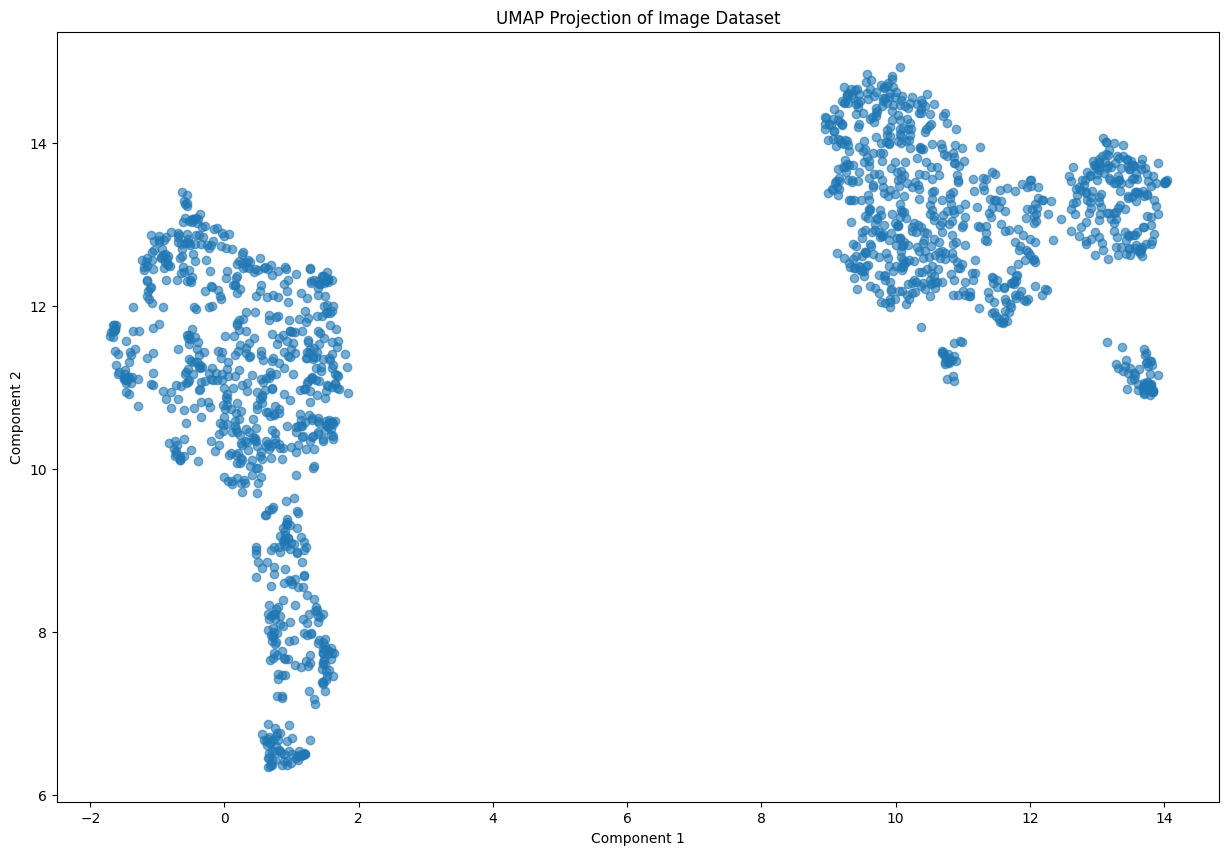

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import numpy as np

# After extracting features (e.g., from a pre-trained CNN)
# features = extract_features(images)  # Shape: (n_images, feature_dim)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_2d_tsne = tsne.fit_transform(features)

# UMAP (often better than t-SNE)
reducer = umap.UMAP(n_components=2, random_state=42)
features_2d_umap = reducer.fit_transform(features)

# Plot with images (thumbnail grid)
plt.figure(figsize=(15, 10))
plt.scatter(features_2d_umap[:, 0], features_2d_umap[:, 1], alpha=0.6)
plt.title('UMAP Projection of Image Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Optional: Add image thumbnails on hover (in notebooks) or plot samples
# This part requires specific notebook environment features and can be complex to implement generally.
# For now, we'll just plot the points.
# for i, (x, y) in enumerate(features_2d_umap):
#     if i % 50 == 0:  # Plot every 50th image to avoid clutter
#         plt.annotate(str(i), (x, y), alpha=0.7)

plt.show()

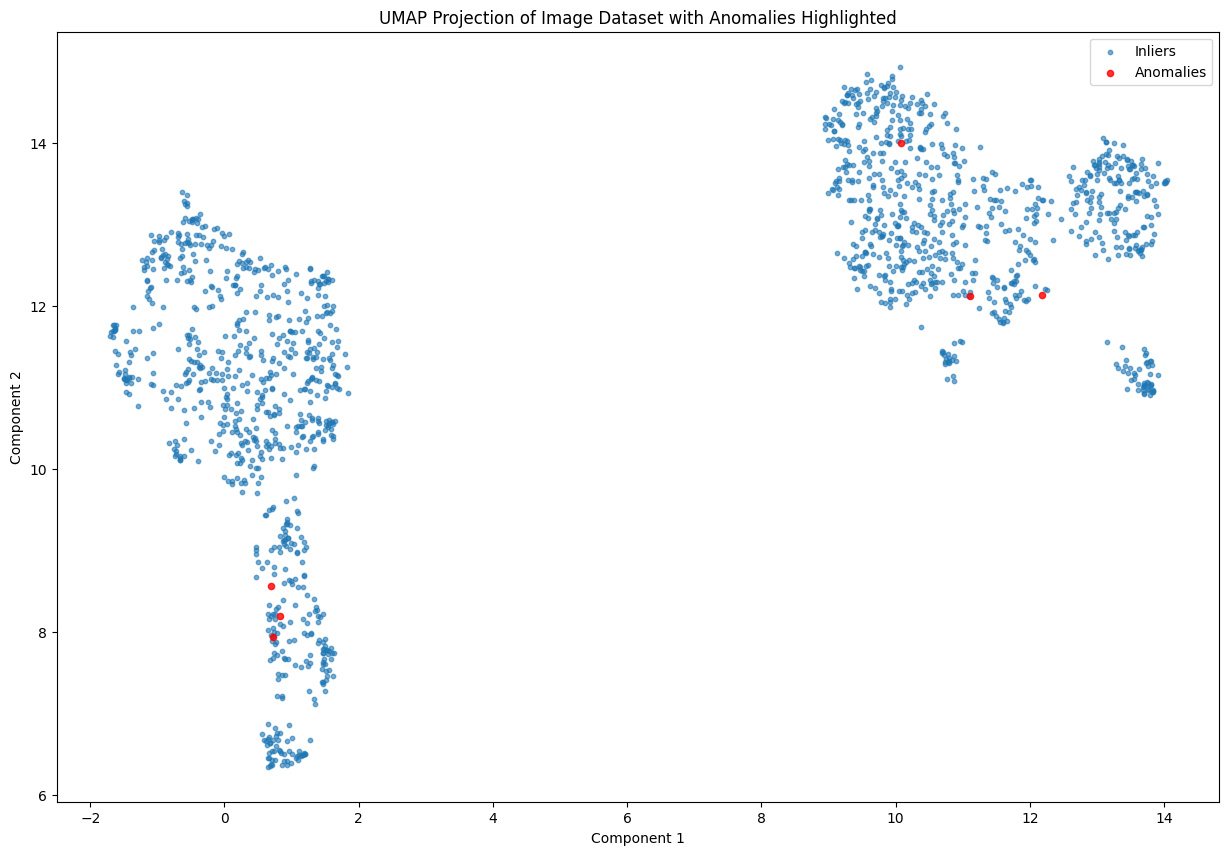

In [ ]:
# Plot with UMAP and highlight anomalies
plt.figure(figsize=(15, 10))

# Plot inliers in one color
plt.scatter(features_2d_umap[inlier_indices, 0], features_2d_umap[inlier_indices, 1], label='Inliers', alpha=0.6, s=10)

# Plot anomalies in a different color
plt.scatter(features_2d_umap[anomaly_indices, 0], features_2d_umap[anomaly_indices, 1], label='Anomalies', color='red', alpha=0.8, s=20)

plt.title('UMAP Projection of Image Dataset with Anomalies Highlighted')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [ ]:
import os
import shutil

# Define a directory to move outliers to instead of deleting, for safety
# You might want to change this path
quarantine_dir = "/content/drive/My Drive/Untitled folder/quarantined_outliers"

# Create the quarantine directory if it doesn't exist
os.makedirs(quarantine_dir, exist_ok=True)

print(f"Attempting to move {len(anomaly_image_paths)} outlier images to '{quarantine_dir}'...")

for img_path in anomaly_image_paths:
    try:
        # Extract the filename from the path
        filename = os.path.basename(img_path)
        # Create the new path in the quarantine directory
        new_path = os.path.join(quarantine_dir, filename)

        # Move the file
        shutil.move(img_path, new_path)
        print(f"Moved: {img_path} -> {new_path}")
    except Exception as e:
        print(f"Error moving {img_path}: {e}")

print("Outlier handling process finished.")

Attempting to move 6 outlier images to '/content/drive/My Drive/Untitled folder/quarantined_outliers'...
Moved: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (75)_0_1_normalized.png -> /content/drive/My Drive/Untitled folder/quarantined_outliers/Car (75)_0_1_normalized.png
Moved: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (794)_0_1_normalized.png -> /content/drive/My Drive/Untitled folder/quarantined_outliers/Car (794)_0_1_normalized.png
Moved: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Motorcycle (129)_0_1_normalized.png -> /content/drive/My Drive/Untitled folder/quarantined_outliers/Motorcycle (129)_0_1_normalized.png
Moved: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Motorcycle (26)_0_1_normalized.png -> /content/drive/My Drive/Untitled folder/quarantined_outliers/Motorcycle (26)_0_1_normalized.png
Moved: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_outpu

# Task
Download the dataset without outliers.

## Create a temporary directory

### Subtask:
Create a new directory to store the dataset without outliers.


**Reasoning**:
Create a new directory to store the dataset without outliers.



In [ ]:
import os

# Define a variable for the path to the temporary directory
temp_dir = "/content/dataset_without_outliers"

# Create the temporary directory
os.makedirs(temp_dir, exist_ok=True)

print(f"Created temporary directory: {temp_dir}")

Created temporary directory: /content/dataset_without_outliers


## Copy non-outlier images

### Subtask:
Copy all images from the original dataset directory to the temporary directory, excluding the images that were moved to the quarantine directory.


**Reasoning**:
Iterate through the original dataset directory, check if each file is in the list of anomaly paths, and copy the non-anomaly files to the temporary directory.



In [ ]:
import shutil

print(f"Copying inlier images to '{temp_dir}'...")

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            original_path = os.path.join(root, file)
            # Check if the original_path is NOT in the list of anomaly_image_paths
            if original_path not in anomaly_image_paths:
                try:
                    # Construct the destination path in the temporary directory
                    relative_path = os.path.relpath(original_path, data_dir)
                    destination_path = os.path.join(temp_dir, relative_path)

                    # Ensure the destination directory exists
                    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

                    # Copy the file
                    shutil.copy(original_path, destination_path)
                    print(f"Copied: {original_path} -> {destination_path}")
                except Exception as e:
                    print(f"Error copying {original_path}: {e}")

print("Finished copying inlier images.")

Copying inlier images to '/content/dataset_without_outliers'...
Copied: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (519)_0_1_normalized.png -> /content/dataset_without_outliers/Car (519)_0_1_normalized.png
Copied: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (542)_0_1_normalized.png -> /content/dataset_without_outliers/Car (542)_0_1_normalized.png
Copied: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (520)_0_1_normalized.png -> /content/dataset_without_outliers/Car (520)_0_1_normalized.png
Copied: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (502)_0_1_normalized.png -> /content/dataset_without_outliers/Car (502)_0_1_normalized.png
Copied: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_output/Car (510)_0_1_normalized.png -> /content/dataset_without_outliers/Car (510)_0_1_normalized.png
Copied: /content/drive/My Drive/Untitled folder/normalized_dataset_0_1_

## Archive the dataset

### Subtask:
Create a zip archive of the temporary directory containing the dataset without outliers.


**Reasoning**:
Create a zip archive of the temporary directory containing the dataset without outliers.



In [ ]:
import shutil

archive_name = 'dataset_without_outliers'
shutil.make_archive(archive_name, 'zip', temp_dir)

print(f"Zip archive '{archive_name}.zip' created at the current working directory.")

Zip archive 'dataset_without_outliers.zip' created at the current working directory.


## Provide download link

### Subtask:
Generate a download link for the created zip archive.


**Reasoning**:
Generate a download link for the created zip archive.



In [ ]:
from google.colab import files

files.download(archive_name + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Clean up

### Subtask:
Remove the temporary directory and the zip archive after the user has downloaded the file (optional, but good practice).


**Reasoning**:
Remove the temporary directory and the zip archive.



In [ ]:
import os
import shutil

# Remove the temporary directory if it exists
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)
    print(f"Removed temporary directory: {temp_dir}")

# Define the path to the zip archive
archive_path = archive_name + '.zip'

# Remove the zip archive if it exists
if os.path.exists(archive_path):
    os.remove(archive_path)
    print(f"Removed zip archive: {archive_path}")

print("Temporary files have been removed.")

Removed temporary directory: /content/dataset_without_outliers
Removed zip archive: dataset_without_outliers.zip
Temporary files have been removed.


## Summary:

### Data Analysis Key Findings

*   A temporary directory named `/content/dataset_without_outliers` was successfully created to store the dataset without outliers.
*   Image files from the original dataset were successfully copied to the temporary directory, excluding those identified as anomalies.
*   A zip archive named `dataset_without_outliers.zip` was successfully created, containing the dataset without outliers from the temporary directory.
*   A download link for the `dataset_without_outliers.zip` file was successfully generated using `google.colab.files.download()`.
*   The temporary directory and the created zip archive were successfully removed as part of the cleanup process.

### Insights or Next Steps

*   The process effectively isolated and packaged the dataset without outliers, making it ready for further use or distribution.
*   Automating the cleanup step is a good practice to free up storage space after the dataset has been downloaded.
